In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as sts
import datetime


In [3]:
df = pd.read_csv('pns-reduzido-2019.csv')

In [4]:
# Substitua os valores nulos na coluna 'Diagnóstico de TOC (Transtorno obsessivo compulsivo)' por zero
df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].fillna(3, inplace=True)


In [5]:
df.isnull().sum()

Unnamed: 0                                                                                                                                                                                                                                                                0
Unidade da Federação                                                                                                                                                                                                                                                      0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     288821
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                              

In [6]:
# Filtra as amostras com diagnóstico igual a 1 e salva em um arquivo separado
df_diagnostico_3 = df[df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 3]
df_diagnostico_3.to_csv('amostras_diagnostico_3.csv', index=False)


In [7]:
agrupado = df_diagnostico_3.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado

Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
3.0    288821
dtype: int64

In [8]:
df_diagnostico_3.isnull().sum()

Unnamed: 0                                                                                                                                                                                                                                                                0
Unidade da Federação                                                                                                                                                                                                                                                      0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     288821
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                              

In [9]:
now = datetime.datetime.now()
# Defina os limites de idade desejados
limite_inferior = 7
limite_superior = 130

# Filtrar linhas com idade dentro do intervalo desejado
df_diagnostico_3 = df_diagnostico_3[(df_diagnostico_3['Ano de nascimento'] <= (now.year - limite_inferior)) & (df_diagnostico_3['Ano de nascimento'] >= (now.year - limite_superior))]

# Agora, df contém apenas as linhas com idade dentro do intervalo especificado (7 a 130 anos)


In [10]:
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Qual é o curso que frequenta'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['E no passado, o(a) Sr(a) fumou algum produto do tabaco diariamente? '])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Alguma dessas doenças limita de alguma forma suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos, etc.)'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=[' Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas '])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Unnamed: 0'])

In [11]:
df_diagnostico_3.fillna(0, inplace=True)

In [12]:
df_diagnostico_3.isnull().sum()

Unidade da Federação                                                                                                                                                                                                                                                 0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     0
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                                                                                               0
Sexo                                                                                                                                                                                                               

In [13]:
agrupado = df_diagnostico_3.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado

Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
3.0    249552
dtype: int64

In [16]:
X = df_diagnostico_3

In [103]:
# Número ótimo de clusters pela técnica do cotovelo (Elbow)

from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_init="auto", n_clusters=k, random_state=1).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
print("Método Elbow concluído!")

Método Elbow concluído!


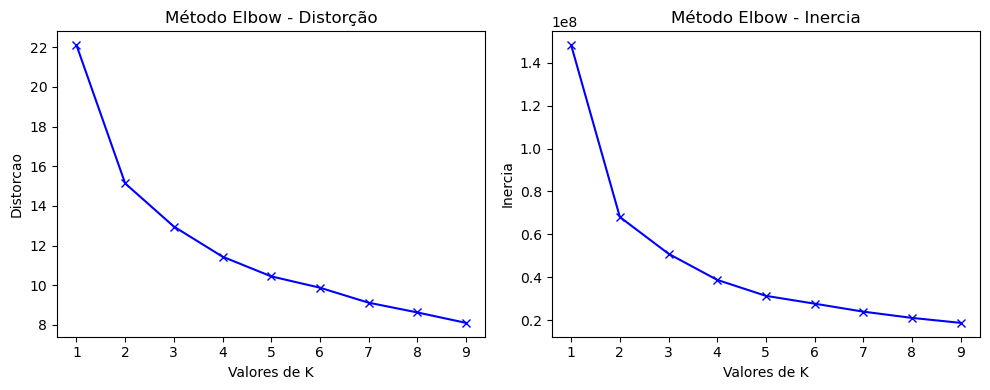

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# for key, val in mapping1.items():
#     print(f'{key} : {val}')

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorcao')
plt.title('Método Elbow - Distorção')

# for key, val in mapping2.items():
#     print(f'{key} : {val}')

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inercia')
plt.title('Método Elbow - Inercia')

fig.tight_layout()
plt.show()

In [106]:
# Número ótimo de clusters pela técnica de Silhoutte Index
#demora muito --- comentar esse código

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

bestK = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_init="auto", n_clusters=n_cluster, random_state=1).fit(X)
    labels = kmeans.labels_
    sil_coeff = silhouette_score(X, labels, metric='euclidean')
    bestK.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
print('K = {}, Coeficiente = {}'.format(bestK.index(max(bestK))+2, max(bestK)))

For n_clusters=2, The Silhouette Coefficient is 0.4463836860473843
For n_clusters=3, The Silhouette Coefficient is 0.34459613680927764
For n_clusters=4, The Silhouette Coefficient is 0.36556835033982554
For n_clusters=5, The Silhouette Coefficient is 0.3572207274721783
For n_clusters=6, The Silhouette Coefficient is 0.3269303450510239
For n_clusters=7, The Silhouette Coefficient is 0.3044242972614497
For n_clusters=8, The Silhouette Coefficient is 0.33016554148856786
For n_clusters=9, The Silhouette Coefficient is 0.31854665437354646
For n_clusters=10, The Silhouette Coefficient is 0.3206503463046146
K = 2, Coeficiente = 0.4463836860473843


In [14]:
k = bestK.index(max(bestK))+2
coef = max(bestK)
print("#Clusters K:", k, "\nCoeficiente:", coef)

NameError: name 'bestK' is not defined

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)

In [18]:
labels = kmeans.labels_

In [20]:
toc_count = {}  # Dicionário para armazenar as contagens de diagnóstico de TOC

for cluster_num in range(10):
    # Filtra as amostras no cluster atual
    cluster_samples = df_diagnostico_3[labels == cluster_num]
    
    # Conta quantos diagnósticos de TOC igual a 2.0 estão presentes no cluster
    toc_count[cluster_num] = (cluster_samples['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 3.0).sum()

# 'toc_count' agora contém o número de diagnósticos de TOC igual a 2.0 em cada cluster
print(toc_count)

{0: 137504, 1: 112048, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
